# Question(1)

## Setup

In [172]:
pip install extra_keras_datasets

In [173]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow_datasets as tfds

print(tf.version.VERSION)
print(keras.__version__)

2.15.0
2.15.0


In [174]:
#testing the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Q(a) Download and load dataset

In [175]:
from extra_keras_datasets import kmnist
# load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = kmnist.load_data(type='kmnist')
# input image dimensions
img_x, img_y = 28, 28

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_images  = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# normalize input between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# split 10000 from training data as validation data
validation_size = 10000
validation_images = train_images[:validation_size]
validation_labels = train_labels[:validation_size]
train_images = train_images[validation_size:]
train_labels = train_labels[validation_size:]

## Q(b,c) Create an ANN with input layer, 2 hidden layers and output layer.

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
def build_model():
  model = tf.keras.Sequential()

  # input layer
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))  # Flatten the input images

  # hidden layers 1
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())  # Batch normalization
  model.add(Dropout(0.5))          # Dropout layer

  # hidden layers 2
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())  # Batch normalization
  model.add(Dropout(0.5))          # Dropout layer

  # output layer
  model.add(Dense(10, activation='softmax'))

  return model

## Q(d) Compile and train model with different optimizer

In [177]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# compile and train the model with Adam optimizer

model_adam = build_model()
model_adam.compile(optimizer=Adam(),
                   loss=SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

history_adam = model_adam.fit(train_images, train_labels,
                              epochs=20,
                              batch_size=128,
                              validation_data=(validation_images, validation_labels),
                              verbose=1)

# compile and train the model with RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(optimizer=RMSprop(),
                      loss=SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(train_images, train_labels,
                                    epochs=20,
                                    batch_size=128,
                                    validation_data=(validation_images, validation_labels),
                                    verbose=1)
# evaluate both models
test_loss_adam, test_accuracy_adam = model_adam.evaluate(test_images, test_labels)
test_loss_rmsprop, test_accuracy_rmsprop = model_rmsprop.evaluate(test_images, test_labels)

print(f'Adam Optimizer - Test accuracy: {test_accuracy_adam:.4f}')
print(f'RMSprop Optimizer - Test accuracy: {test_accuracy_rmsprop:.4f}')

Epoch 1/20
391/391 [==============================] - 4s 5ms/step - loss: 0.8182 - accuracy: 0.7448 - val_loss: 0.3579 - val_accuracy: 0.8921
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.4537 - accuracy: 0.8591 - val_loss: 0.2737 - val_accuracy: 0.9153
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.3727 - accuracy: 0.8849 - val_loss: 0.2347 - val_accuracy: 0.9266
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.3214 - accuracy: 0.9001 - val_loss: 0.2206 - val_accuracy: 0.9340
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2908 - accuracy: 0.9105 - val_loss: 0.1987 - val_accuracy: 0.9377
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2688 - accuracy: 0.9169 - val_loss: 0.1875 - val_accuracy: 0.9412
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2511 - accuracy: 0.9226 - val_loss: 0.1798 - val_accuracy: 0.9449
Epoch 

## Q(e)Plot

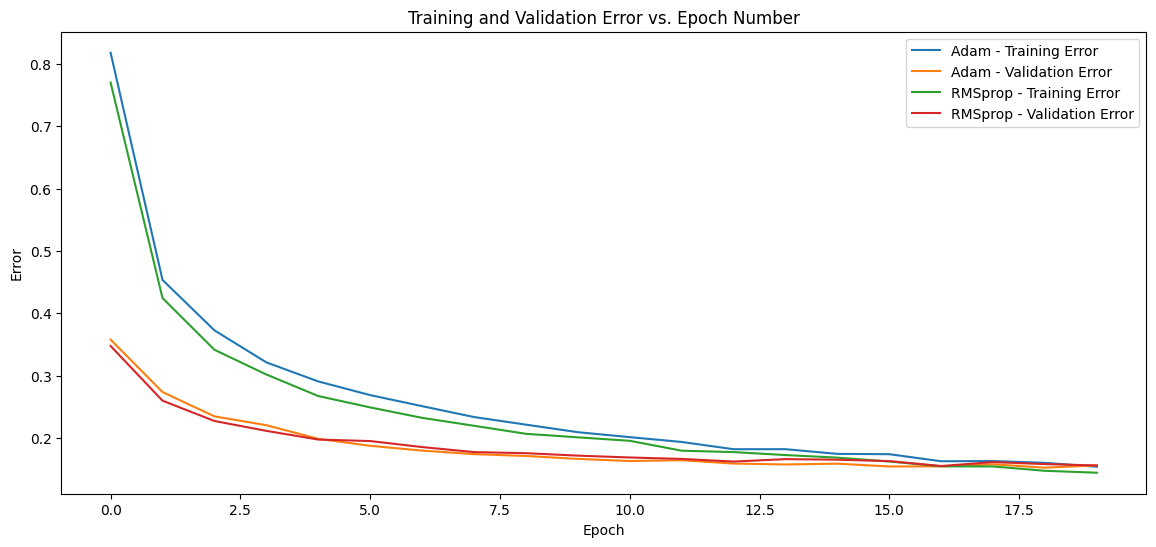

In [178]:
import matplotlib.pyplot as plt
# Plotting the performance
plt.figure(figsize=(14, 6))

# Training and validation error for Adam optimizer
plt.plot(history_adam.history['loss'], label='Adam - Training Error')
plt.plot(history_adam.history['val_loss'], label='Adam - Validation Error')

# Training and validation error for RMSprop optimizer
plt.plot(history_rmsprop.history['loss'], label='RMSprop - Training Error')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop - Validation Error')

plt.title('Training and Validation Error vs. Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

## Q(f) Final accuracy and cunfusion maxtrix

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

     Class 0       0.93      0.92      0.92      1000
     Class 1       0.89      0.89      0.89      1000
     Class 2       0.82      0.87      0.84      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.95      0.88      0.91      1000
     Class 6       0.85      0.94      0.89      1000
     Class 7       0.94      0.88      0.91      1000
     Class 8       0.89      0.90      0.90      1000
     Class 9       0.93      0.89      0.91      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



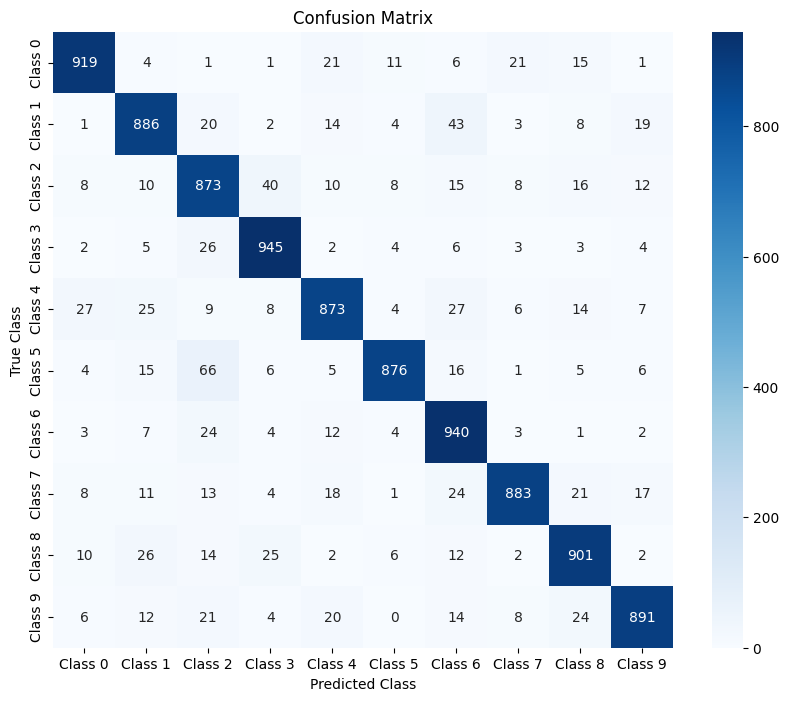

Class-wise Accuracies:
Class 0: 0.92
Class 1: 0.89
Class 2: 0.87
Class 3: 0.94
Class 4: 0.87
Class 5: 0.88
Class 6: 0.94
Class 7: 0.88
Class 8: 0.90
Class 9: 0.89


In [179]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the classes
predictions = model_rmsprop.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
class_report = classification_report(test_labels, predicted_classes, target_names=[f'Class {i}' for i in range(10)])
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(10)], yticklabels=[f'Class {i}' for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Calculate accuracy for each class
class_accuracies = {}
for i in range(10):
    true_positives = conf_matrix[i, i]
    total_samples = np.sum(conf_matrix[i, :])
    class_accuracies[f'Class {i}'] = true_positives / total_samples

print("Class-wise Accuracies:")
for class_name, accuracy in class_accuracies.items():
    print(f'{class_name}: {accuracy:.2f}')

# Question(2)

## Quesion(A) Setup environment

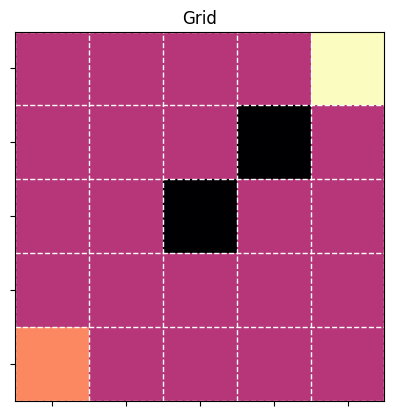

In [180]:
import numpy as np
import matplotlib.pyplot as plt

class Gridworld:
    def __init__(self, size=5):
        self.size = size
        self.start_state = (0, 0)
        self.goal_state = (4, 4)
        self.obstacles = [(2, 2), (3, 3)]
        self.actions = {
            'U': np.array([0, 1]),
            'D': np.array([0, -1]),
            'L': np.array([-1, 0]),
            'R': np.array([1, 0])
        }
        self.reset()

    def reset(self):
        self.agent_position = self.start_state
        return self.agent_position

    def step(self, action):
        action = self.actions[action]
        next_state = tuple(np.array(self.agent_position) + action)
        x, y = next_state

        if x < 0 or x >= self.size or y < 0 or y >= self.size or next_state in self.obstacles:
            return self.agent_position, 0, False
        elif next_state == self.goal_state:
            self.agent_position = next_state
            return self.agent_position, 1, True
        else:
            self.agent_position = next_state
            return self.agent_position, -0.1, False

    def render(self, policy=None, state_values=None):
        fig, ax = plt.subplots()
        grid = np.zeros((self.size, self.size))
        for obstacle in self.obstacles:
            grid[obstacle] = -1
        grid[self.goal_state] = 1
        grid[self.start_state] = 0.5
        ax.imshow(grid, cmap='magma', interpolation='none')

        ax.set_xticks(np.arange(self.size + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(self.size + 1) - 0.5, minor=True)
        ax.grid(which='minor', color='white', linestyle='--', linewidth=1)
        ax.tick_params(which='minor', size=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        directions = {
            'U': (0, 0.3),
            'D': (0, -0.3),
            'L': (-0.3, 0),
            'R': (0.3, 0)
        }

        title = "Grid"
        if policy is not None:
            for i in range(self.size):
                for j in range(self.size):
                    if policy[i, j] in directions:
                        dx, dy = directions[policy[i, j]]
                        ax.arrow(i, j, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='blue')
            title += " with Optimal Policy"

        if state_values is not None:
            for i in range(self.size):
                for j in range(self.size):
                    ax.text(j, i, f"{state_values[i, j]:.2f}", ha='center', va='center')
            if policy is not None:
                title += " and State Value"
            else:
                title = "GridWorld with State Value"

        plt.title(title)
        plt.gca().invert_yaxis()
        plt.show()

# Example usage
gridworld = Gridworld()
gridworld.render()

## Q(B) Algorithm design

In [207]:
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.95, epsilon=0.05, episodes=6000, info_frequency=100, log=True):
        self.env = env
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # epsilon-greedy exploration
        self.episodes = episodes
        self.actions = ['U', 'D', 'L', 'R']
        self.q_table = np.zeros((env.size, env.size, len(self.actions)))
        self.state_values = np.zeros((env.size, env.size))  # Value function
        self.optimal_policy = np.full((env.size, env.size), ' ')
        self.cumulative_rewards = []
        self.log = log

    # epsilon-greedy policy
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.actions)  # Exploration
        else:
            state_action = self.q_table[state[0], state[1], :]
            action_index = np.argmax(state_action)
            return self.actions[action_index]  # Exploitation

    # update rule
    def update_q_table(self, state, action, reward, next_state):
        action_index = self.actions.index(action)
        next_state_value = np.max(self.q_table[next_state[0], next_state[1], :])
        td_target = reward + self.gamma * next_state_value
        td_error = td_target - self.q_table[state[0], state[1], action_index]
        self.q_table[state[0], state[1], action_index] += self.alpha * td_error

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()  # Initialize state
            done = False
            total_reward = 0
            steps = 0
            while not done:  # Loop until episode ends
                action = self.choose_action(state)  # Choose action based on epsilon-greedy policy
                next_state, reward, done = self.env.step(action)  # Take action and observe reward
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1
            self.cumulative_rewards.append(total_reward)
            if self.log:
              print(f'Episode {episode + 1}/{self.episodes}, Total steps: {steps}, Total reward: {np.round(total_reward, 2)}')

        self.get_optimal_policy()
        self.get_state_value()

    def plot_rewards(self):
        plt.plot(range(self.episodes), self.cumulative_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Cumulative Reward')
        plt.title('Cumulative Reward per Episode')
        plt.show()

    def get_optimal_policy(self):
        for i in range(self.env.size):
            for j in range(self.env.size):
                if (i, j) in self.env.obstacles or (i, j) == self.env.goal_state:
                    continue
                optimal_action_index = np.argmax(self.q_table[i, j, :])
                self.optimal_policy[i, j] = self.actions[optimal_action_index]

    def get_state_value(self):
        for i in range(self.env.size):
            for j in range(self.env.size):
                if (i, j) in self.env.obstacles or (i, j) == self.env.goal_state or (i, j) == self.env.start_state:
                    continue
                optimal_action_index = np.argmax(self.q_table[i, j, :])
                self.state_values[i, j] = np.round(self.q_table[i, j, optimal_action_index], 2)

    def plot_optimal_policy(self):
        self.env.render(policy=self.optimal_policy)

    def plot_optimal_values(self):
        self.env.render(state_values=self.state_values)

    def plot_optimal_policy_and_values(self):
        self.env.render(policy=self.optimal_policy, state_values=self.state_values)

# Example usage
env = Gridworld(size=5)
agent = QLearningAgent(env)
agent.learn()

Streaming output truncated to the last 5000 lines.
Episode 1001/6000, Total steps: 8, Total reward: 0.3
Episode 1002/6000, Total steps: 8, Total reward: 0.3
Episode 1003/6000, Total steps: 8, Total reward: 0.3
Episode 1004/6000, Total steps: 8, Total reward: 0.3
Episode 1005/6000, Total steps: 8, Total reward: 0.3
Episode 1006/6000, Total steps: 8, Total reward: 0.3
Episode 1007/6000, Total steps: 9, Total reward: 0.3
Episode 1008/6000, Total steps: 8, Total reward: 0.3
Episode 1009/6000, Total steps: 8, Total reward: 0.3
Episode 1010/6000, Total steps: 8, Total reward: 0.3
Episode 1011/6000, Total steps: 9, Total reward: 0.3
Episode 1012/6000, Total steps: 8, Total reward: 0.3
Episode 1013/6000, Total steps: 11, Total reward: 0.1
Episode 1014/6000, Total steps: 8, Total reward: 0.3
Episode 1015/6000, Total steps: 8, Total reward: 0.3
Episode 1016/6000, Total steps: 8, Total reward: 0.3
Episode 1017/6000, Total steps: 8, Total reward: 0.3
Episode 1018/6000, Total steps: 8, Total reward

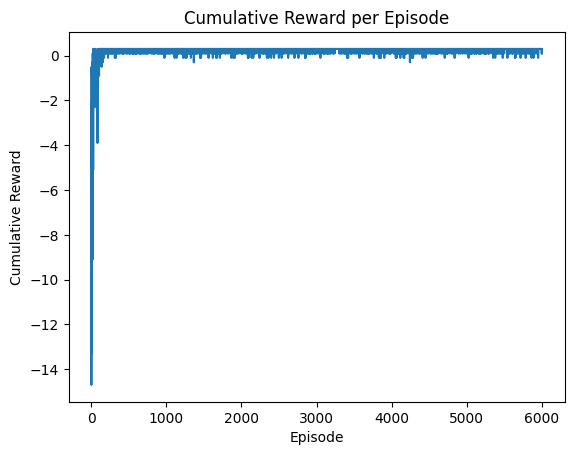

In [195]:
# plot reward
agent.plot_rewards()

## Q(C) Fine tuning

In [183]:
def train_agent(alpha, gamma, epsilon, episodes=6000, log=False):
    agent = QLearningAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episodes, log=False)
    agent.learn()
    return agent.cumulative_rewards

# Experiment with different parameter values
alphas = [0.01, 0.1, 0.2]
gammas = [0.5, 0.75, 0.95]
epsilons = [0.01, 0.05, 0.2]

results_alpha = []
results_gamma = []
results_epsilon = []

for alpha in alphas:
    print(f"Training with alpha={alpha}")
    rewards = train_agent(alpha, 0.95, 0.05)
    results_alpha.append((rewards, f'alpha={alpha}'))
    print(f'Finished training with alpha={alpha}')

for gamma in gammas:
    print(f"Training with gamma={gamma}")
    rewards = train_agent(0.1, gamma, 0.05)
    results_gamma.append((rewards, f'gamma={gamma}'))
    print(f'Finished training with gamma={gamma}')

for epsilon in epsilons:
    print(f"Training with epsilon={epsilon}")
    rewards = train_agent(0.1, 0.95, epsilon)
    results_epsilon.append((rewards, f'epsilon={epsilon}'))
    print(f'Finished training with epsilon={epsilon}')

Training with alpha=0.01
Finished training with alpha=0.01
Training with alpha=0.1
Finished training with alpha=0.1
Training with alpha=0.2
Finished training with alpha=0.2
Training with gamma=0.5
Finished training with gamma=0.5
Training with gamma=0.75
Finished training with gamma=0.75
Training with gamma=0.95
Finished training with gamma=0.95
Training with epsilon=0.01
Finished training with epsilon=0.01
Training with epsilon=0.05
Finished training with epsilon=0.05
Training with epsilon=0.2
Finished training with epsilon=0.2


Training Agent 1: alpha=0.1, gamma=0.95, epsilon=0.1
Parameters: alpha=0.1, gamma=0.95, epsilon=0.05


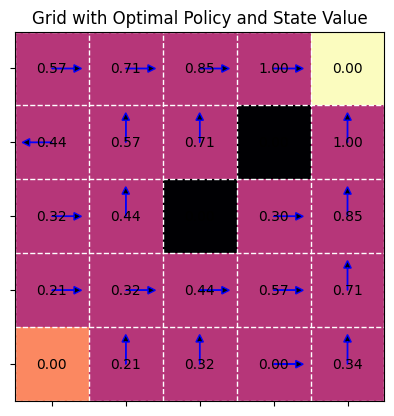

Training Agent 2: alpha=0.9, gamma=0.95, epsilon=0.1
Parameters: alpha=0.9, gamma=0.95, epsilon=0.05


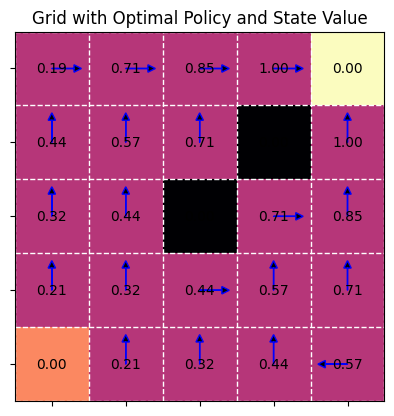

Training Agent 3: alpha=0.1, gamma=0.5, epsilon=0.1
Parameters: alpha=0.1, gamma=0.5, epsilon=0.05


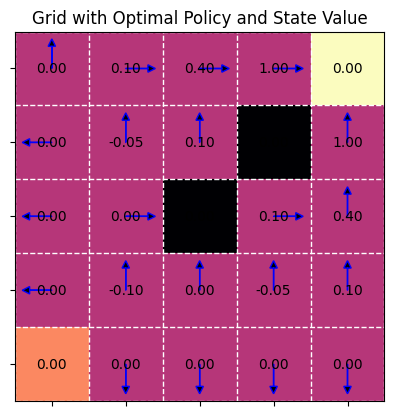

Training Agent 4: alpha=0.1, gamma=0.95, epsilon=0.5
Parameters: alpha=0.1, gamma=0.95, epsilon=0.5


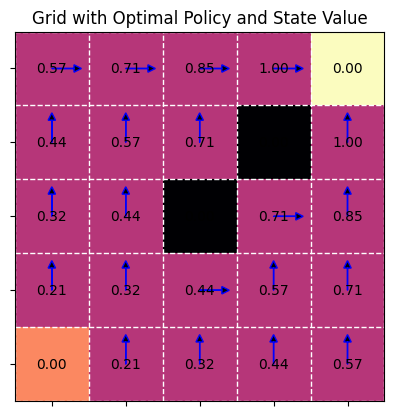

In [202]:
# Helper function to train an agent with specified parameters and plot the results
def train_and_plot(alpha, gamma, epsilon, episodes=6000):
    agent = QLearningAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episodes, log=False)
    agent.learn()
    print(f"Parameters: alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
    agent.plot_optimal_policy_and_values()

# Define environment
env = Gridworld(size=5)

# Train and plot for different parameter settings
# Baseline
print("Training Agent 1: alpha=0.1, gamma=0.95, epsilon=0.1")
train_and_plot(alpha=0.1, gamma=0.95, epsilon=0.05)

# higher learning rate
print("Training Agent 2: alpha=0.9, gamma=0.95, epsilon=0.1")
train_and_plot(alpha=0.9, gamma=0.95, epsilon=0.05)

# lower discount factors
print("Training Agent 3: alpha=0.1, gamma=0.5, epsilon=0.1")
train_and_plot(alpha=0.1, gamma=0.5, epsilon=0.05)

# higher exploration rate
print("Training Agent 4: alpha=0.1, gamma=0.95, epsilon=0.5")
train_and_plot(alpha=0.1, gamma=0.95, epsilon=0.5)

## Q(D) Evaluate

Parameters: alpha=0.1, gamma=0.95, epsilon=0.1


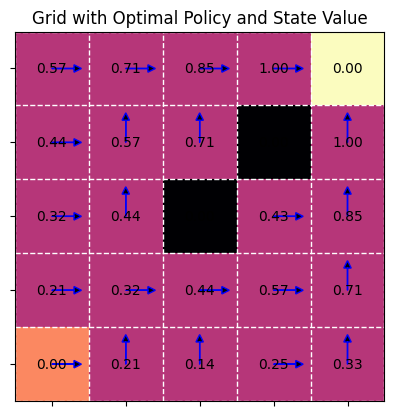

Optimal Path from Start to Goal: [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


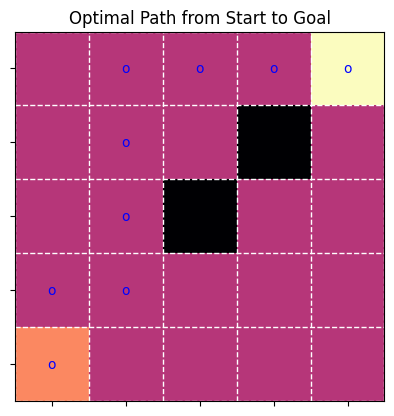

In [208]:
# Helper function to train an agent and plot the optimal policy with the path from start to goal
def train_and_evaluate(alpha, gamma, epsilon, episodes=6000):
    agent = QLearningAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episodes, log=False)
    agent.learn()
    print(f"Parameters: alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
    agent.plot_optimal_policy_and_values()
    return agent.optimal_policy

# Define environment
env = Gridworld(size=5)

# Train and evaluate the agent with specific parameters
optimal_policy = train_and_evaluate(alpha=0.1, gamma=0.95, epsilon=0.1)

# Function to trace the optimal path from start to goal state
def trace_optimal_path(policy, start_state, goal_state):
    current_state = start_state
    path = [current_state]
    while current_state != goal_state:
        action = policy[current_state[0], current_state[1]]
        next_state = tuple(np.array(current_state) + env.actions[action])
        path.append(next_state)
        current_state = next_state
    return path

# Trace and print the optimal path
optimal_path = trace_optimal_path(optimal_policy, env.start_state, env.goal_state)
print("Optimal Path from Start to Goal:", optimal_path)

# Visualize the optimal path
def plot_optimal_path(optimal_path):
    fig, ax = plt.subplots()
    grid = np.zeros((env.size, env.size))
    for obstacle in env.obstacles:
        grid[obstacle] = -1
    grid[env.goal_state] = 1
    grid[env.start_state] = 0.5
    ax.imshow(grid, cmap='magma', interpolation='none')

    ax.set_xticks(np.arange(env.size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(env.size + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='white', linestyle='--', linewidth=1)
    ax.tick_params(which='minor', size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for (i, j) in optimal_path:
        ax.text(j, i, 'o', ha='center', va='center', color='blue')

    plt.title("Optimal Path from Start to Goal")
    plt.gca().invert_yaxis()
    plt.show()

# Plot the optimal path
plot_optimal_path(optimal_path)